In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
# Regresja liniowa

def linear_regresion(x,y,test_size,random_state):


    x=x.reshape(-1,1)
    regr=linear_model.LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    reg_1 =regr.fit(X_train, y_train) #dopasowanie do danych
    predicted=regr.predict(X_test) #przewidywane wartości
    
    return (regr.coef_[0], metrics.mean_absolute_error(y_test,predicted)) #wspołczynnik nachylenia prostej a i bład a                                                




def powietrze(path): #wrzuć scieżkę pliku (np. 'C:/Users/Downloads/asd.txt')


    with open (path, 'r') as txt:
        dane =txt.read().splitlines()
        dane=[i.split('\t',2) for i in dane[156:]]


        time =np.array([float(i[0]) for i in dane])
        distance =np.array([float(i[1])*10**6 for i in dane]) # metry zamieniam na mikro metry
        force =np.array([float(i[2]) for i in dane]) # volty

        
    plt.figure(figsize=(15,15))
    plt.plot(distance[:], force[:],'.',markersize=10)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('Distance [um]',fontsize=20)
    plt.ylabel('Force [V]',fontsize=20)
    plt.grid()
    plt.title('Krzywe siłowe dla powietrza', fontsize=20)
    
#     błąd pomiaru
    distance_błąd = 5*10**(-4)
    force_błąd = 5*10**(-4)
    
#     szukam minima i maksima 
    imax=np.where(force==max(force[:1200]))[0][0]
    imin=np.where(force==min(force[:1200]))[0][0]
#     i_centre=round( (imax +imin)/2 )
    
#     regresja liniowa (nachylenie krzywej kalibracyjnej)
    reg_arg = 50 #Ilość punktów użytych do regresji
    [a, a_błąd]=linear_regresion(distance[imin : imin+reg_arg], force[imin : imin+reg_arg], test_size=0.2, random_state=0)


    
    # przeliczam z voltów na niutony i obniżam do 0
    k=0.02
    q = -1/a*k*(10**(-6))*(10**9) #mnożnik do zamiany voltów na niutony
    
    siła= q *force #nano niutony
    siła=siła-min(siła[:1200]) 
    f0=siła[imin+2] #powyższam wartość siły, bo min(siła) jest odstająca od wykresu,  ustawiam punkt zerowy na zagięciu wykresu
    siła=siła-f0

#     Błąd siły (założenie, że błąd pomiaru siły[V] rożny od 0)
    siła_błąd= lambda x : np.sqrt( ( -k*(10**(-6))*(10**9)*x*(-1/a**2)*a_błąd )**2 + (q*force_błąd)**2 ) #x to force
    
    a_siła = q * a #współczynnik a się skaluje przez mnożnik 



    plt.figure(figsize=(20,20))
    plt.plot(distance[:], siła[:],'.',markersize=10)


#     # linia czarna przerywana
    plt.axhline(f0,color='k',ls='--',lw=4, label = 'Linia = 0')
    
    
#     Siła adhezji
    imin_all=np.where(siła==min(siła[:]))[0][0] # minimum globalne
    adhezja = -siła[imin_all] 
    error_adhezja = siła_błąd(force[imin_all])
    
    
    
    
    # przesunie b  lini kalibracyjnej żółta  
    b_siła= siła[imin] - (a_siła * distance[imin])
    b_siła= b_siła - f0 - (a_siła*( distance[imin+2] ) +b_siła )

    krzyw_kalib = lambda x: a_siła*x +b_siła                            
    
    plt.plot( distance[imin+5 : imin+50] , krzyw_kalib( distance[imin+5 : imin+50] ), 'r',linewidth=3, label = 'Linia kalibracyjna')

    


#     Strzałka adhezja
    plt.annotate(' ', xy = (distance[imin_all] ,0), xytext = (distance[imin_all], siła[imin_all]),
                arrowprops=dict(facecolor='black',arrowstyle="<->")
                ,fontsize=16)
    plt.annotate('Siła adhezji', xy=( distance[imin_all] +0.03 , siła[imin_all]/2),
            ha='left',fontsize=16
                )
    
    plt.legend(fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Distance [um]',fontsize=20)
    plt.ylabel('Force [nN]',fontsize=20)
    plt.grid()
    plt.title('Wykres F (distance)', fontsize=20)




    print(f'Siła[V] max = \t\t\t\t{force[imax]} +- {force_błąd}\nSiła[V] min = \t\t\t\t{force[imin]} +- {force_błąd}\nWspółczynnik linii kalibracyjnej a = \t{a} +- {a_błąd}')
    print(f'Współczynnik sprężystości k = \t\t{k}\nSiła adhezji[nN] = \t\t\t{adhezja} +- {error_adhezja}')

No handles with labels found to put in legend.


Siła[V] max = 				0.15533447265625 +- 0.0005
Siła[V] min = 				-0.94268798828125 +- 0.0005
Współczynnik linii kalibracyjnej a = 	-0.679211314399331 +- 0.00026903387342833705
Współczynnik sprężystości k = 		0.02
Siła adhezji[nN] = 			27.973980612245988 +- 0.02649916349319483


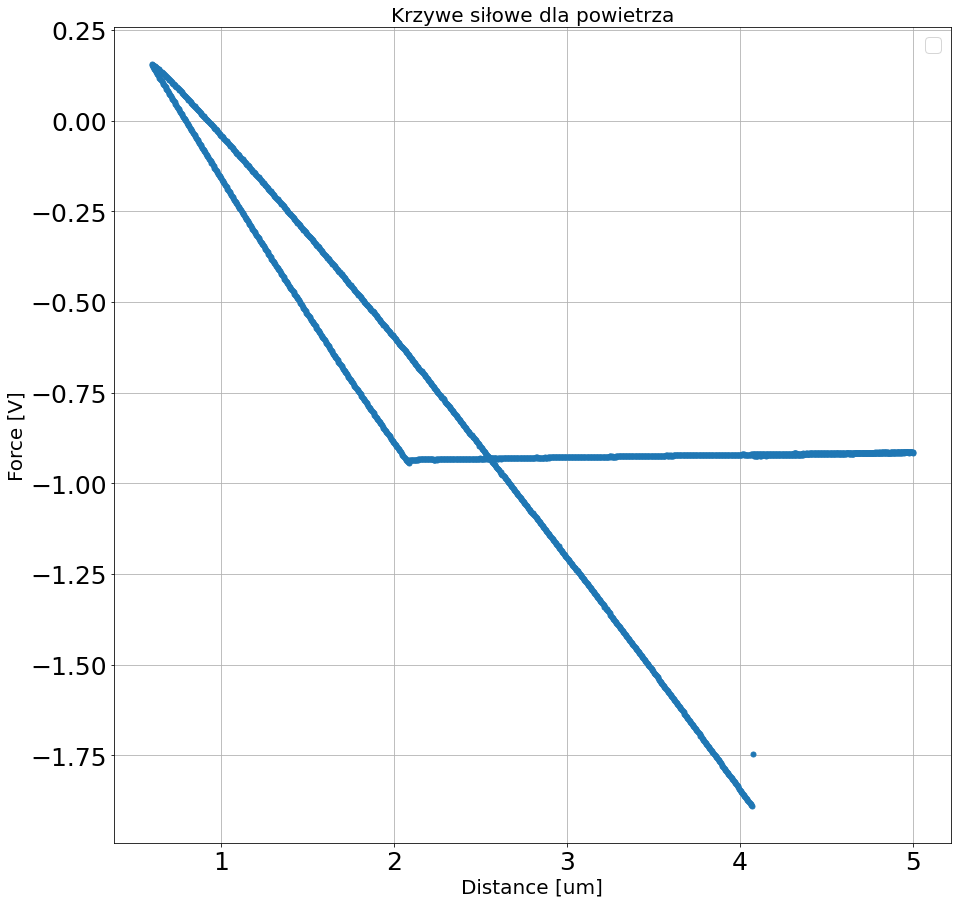

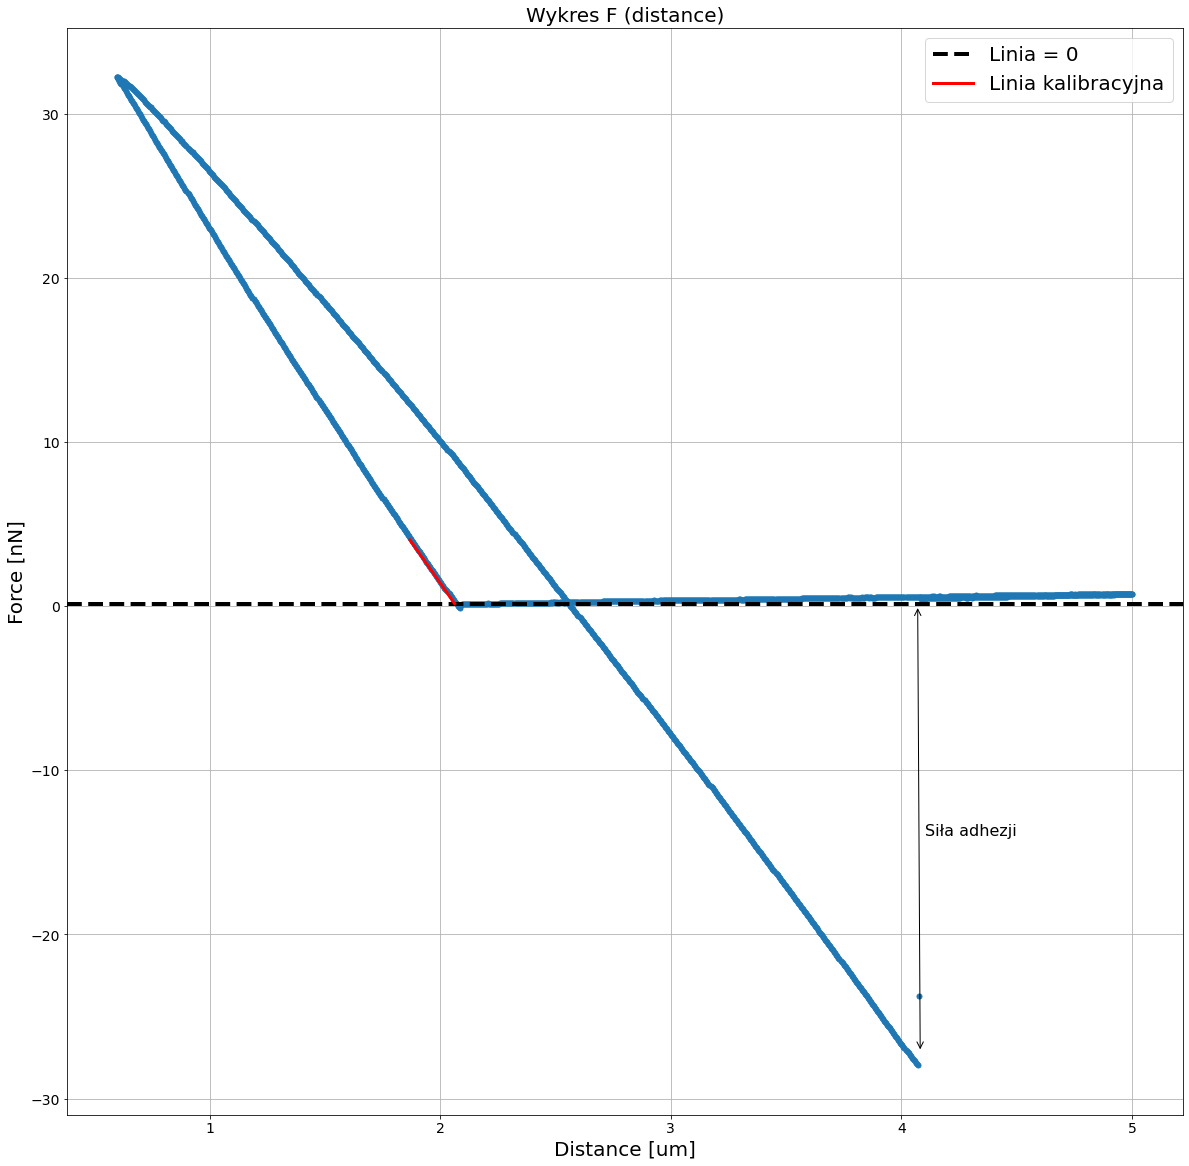

In [8]:
powietrze('C:/Users/barte/Downloads/B_Klima_kalibracja_powietrze (1).txt')